# Тестовые примера расчета ЭЦН с использованием Unifloc VBA

In [6]:

import os
import sys

import numpy as np 
import matplotlib.pyplot as plt 


"""
Пример автоматического определения путей для примера поставляемого с Unifloc VBA
работает, только если расчетный файл находится во вложенной папке относительно надстройки.
Для других вариантов расположения расчетного файла - ссылки на папки надо модифицировать
""" 


# все примеры находятся во вложенной папке репозитория Unifloc VBA 
# поэтому здесь определяется путь к папке репозитория Unifloc VBA 
# если надо - подмените путь здесь на свой
current_path = ".."
unifloc_path = os.path.abspath(current_path)
print('Путь к папке Unifloc VBA -- '+ unifloc_path)

unifloc_xlam = unifloc_path +'\\UniflocVBA_7.xlam'
print('Путь к надстройке Unifloc VBA -- '+ unifloc_xlam)

# добавим в путь поиска пакетов python папку где находится репозиторий Unifloc VBA
sys.path.insert(0, unifloc_path) 
# импортируем python_api для Unifloc VBA
import unifloc_vba_python_api.python_api as unifloc
# создаем объект имеющий доступ к расчетам Unifloc VBA
unf = unifloc.API(unifloc_xlam)

Путь к папке Unifloc VBA -- c:\unifloc\unifloc_vba
Путь к надстройке Unifloc VBA -- c:\unifloc\unifloc_vba\UniflocVBA_7.xlam


## 1. Номинальные характеристики ЭЦН

Параметры ЭЦН закодированы
{"q_nom_sm3day":80,"head_nom_m":1500,"freq_nom_Hz":50,"name":"ESP-80-1500","ESP_ID":1006,"num_stages":250,"gas_correct_model":1,"gas_correct_stage_by_stage":0,"calibr_head":1,"calibr_power":1,"calibr_rate":1,"dnum_stages_integrate":1}
максимальная подача на номинальной частоте = 175.0


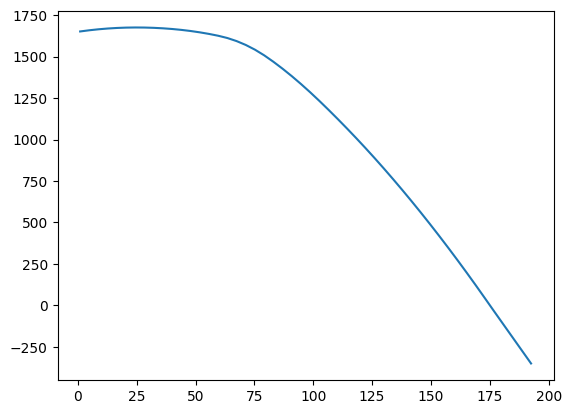

In [7]:
ESP_q_nom =	80
ESP_head_nom =	1500
freq_nom =	50
ESP_ID =	1006
num_stages =	250
calibr_head =	1
calibr_rate =	1
calibr_power =	1
gas_correct_model =	1
gas_correct_stage_by_stage =	0
dnum_stages_integrate =	1

esp = unf.encode_ESP_pump(q_nom_sm3day=ESP_q_nom,
                          head_nom_m=ESP_head_nom,
                          freq_nom_Hz=freq_nom,
                          calibr_head=calibr_head,
                          calibr_rate=calibr_rate,
                          calibr_power=calibr_power,
                          gas_correct_model=gas_correct_model,
                          gas_correct_stage_by_stage=gas_correct_stage_by_stage,
                          dnum_stages_integrate=dnum_stages_integrate)

print('Параметры ЭЦН закодированы')
print(esp)

max_rate = unf.ESP_rate_max_sm3day(esp)
print(f'максимальная подача на номинальной частоте = {max_rate}')

rates = np.linspace(1, max_rate*1.1, 50 )
heads = [unf.ESP_head_m(esp_json=esp, freq_Hz=50, qliq_m3day= rt) for rt in rates]

plt.plot(rates, heads)

## 2. Расчет давления

In [8]:
pvt = unf.encode_PVT()
feed = unf.encode_feed(fluid=pvt)

In [9]:
print(feed)

{"gamma_gas":0.6,"gamma_oil":0.86,"gamma_wat":1,"rsb_m3m3":100,"PVT_corr_set":0,"q_liq_sm3day":10}


In [10]:
unf.ESP_p_atma(100, esp_json=esp)

138.91570057234108